**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

**Mount Google Drive**





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Show Data**

In [4]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Deep Learning Project 2/ColomboStockExchange.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-01,798.500000,798.500000,798.500000,798.500000,798.500000,0.0
1,1997-07-02,805.299988,805.299988,805.299988,805.299988,805.299988,0.0
2,1997-07-03,810.799988,810.799988,810.799988,810.799988,810.799988,0.0
3,1997-07-07,828.200012,828.200012,828.200012,828.200012,828.200012,0.0
4,1997-07-08,821.400024,821.400024,821.400024,821.400024,821.400024,0.0


**Data Preprocessing**

In [5]:
data.dropna(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')

**Data Partitioning**

In [6]:
split_index = int(len(data) * 0.8)
train_data, test_data = data.iloc[:split_index], data.iloc[split_index:]

**Normalization**

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_normalized = scaler.fit_transform(train_data[['Close']])
test_data_normalized = scaler.transform(test_data[['Close']])

**Sequence Creation**

In [8]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X_train, y_train = create_sequences(train_data_normalized, seq_length)
X_test, y_test = create_sequences(test_data_normalized, seq_length)

**Train the Model**

In [9]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
137/137 [==============================] - 9s 35ms/step - loss: 0.0096
Epoch 2/20
137/137 [==============================] - 6s 44ms/step - loss: 2.3989e-04
Epoch 3/20
137/137 [==============================] - 7s 50ms/step - loss: 2.1816e-04
Epoch 4/20
137/137 [==============================] - 4s 26ms/step - loss: 2.0437e-04
Epoch 5/20
137/137 [==============================] - 4s 27ms/step - loss: 1.9086e-04
Epoch 6/20
137/137 [==============================] - 4s 32ms/step - loss: 1.8895e-04
Epoch 7/20
137/137 [==============================] - 5s 33ms/step - loss: 1.5242e-04
Epoch 8/20
137/137 [==============================] - 4s 27ms/step - loss: 1.4867e-04
Epoch 9/20
137/137 [==============================] - 4s 27ms/step - loss: 1.5946e-04
Epoch 10/20
137/137 [==============================] - 5s 38ms/step - loss: 1.1934e-04
Epoch 11/20
137/137 [==============================] - 4s 26ms/step - loss: 1.2565e-04
Epoch 12/20
137/137 [==============================] - 4

**Evaluation of the model**

In [10]:
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = predicted_stock_prices.reshape(-1, 1)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)

34/34 [==============================] - 2s 13ms/step


**Root Mean Squred Error**

In [11]:
actual_stock_prices = test_data['Close'][seq_length:]
rmse = math.sqrt(mean_squared_error(actual_stock_prices, predicted_stock_prices))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 124.56407789805529


**Visualization Actual vs. Predicted Stock Prices**

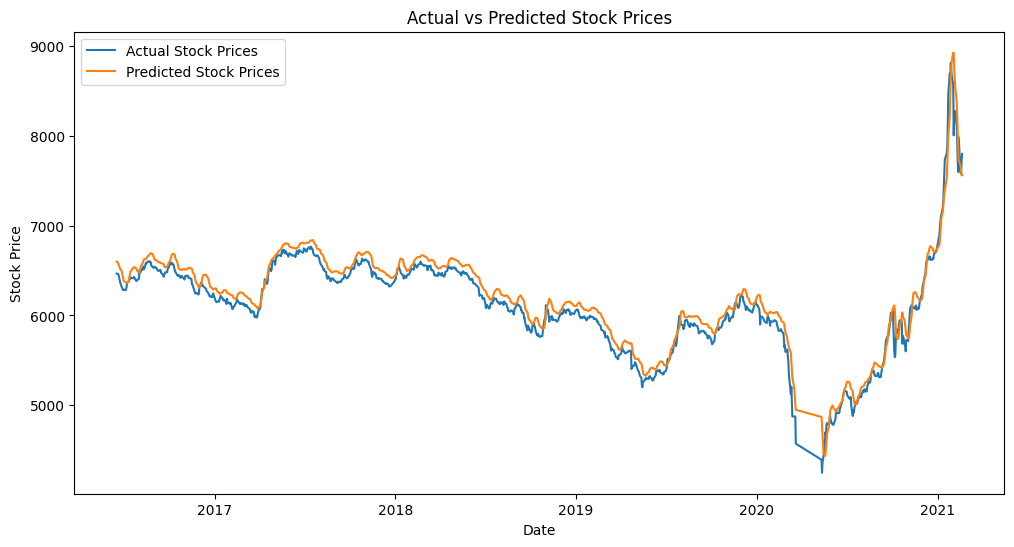

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[seq_length:], test_data['Close'][seq_length:], label='Actual Stock Prices')
plt.plot(test_data.index[seq_length:], predicted_stock_prices, label='Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()